In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision as tv

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
class Dataset2class(torch.utils.data.Dataset): #2 клааса, наследуем 
    def  __init__(self, path_cats:str, path_dogs:str):
        super().__init__()

        self.path_cats = path_cats
        self.path_dogs = path_dogs

        self.cats_list = sorted(os.listdir(path_cats))
        self.dogs_list = sorted(os.listdir(path_dogs))

    def __len__(self): #функция для получения длины датасета
        return len(self.cats_list) + len(self.dogs_list)

    def __getitem__(self,idx): #для получения индексов, чтобы использовать как массив
        if idx <= len(self.cats_list):
            class_id = 0
            img_path = os.path.join(self.path_cats, self.cats_list[idx])
        else:
            class_id = 1
            idx-=len(self.cats_list) #чтобы обращаться ко второй папке с 0-го элемента
            #обе папки стоят подряд в датасете

            img_path = os.path.join(self.path_dogs, self.dogs_list[idx]) #склеиваем два пути в один
                                                                    #сначала название папки общей, затем уже конкретно коты или собаки
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

        img = img.astype(np.float32) #значения пикселей храним в вещественном формате
        img = img/255.0 #нормализуем от 0 до 1

        img.transpose((2,0,1))
        t_img = torch.from_numpy(img)
        t_class_id = torch.tensor(class_id)

        return {'img': t_img, 'label' : t_class_id}


In [17]:
train_cats_path = 'D:\work\python\projects\CNN_cats_and_dogs\dataset_cats_and_dogs\\train\cats'
train_dogs_path = 'D:\work\python\projects\CNN_cats_and_dogs\dataset_cats_and_dogs\\train\dogs'

train_ds_cats_dogs = Dataset2class(train_cats_path, train_dogs_path)

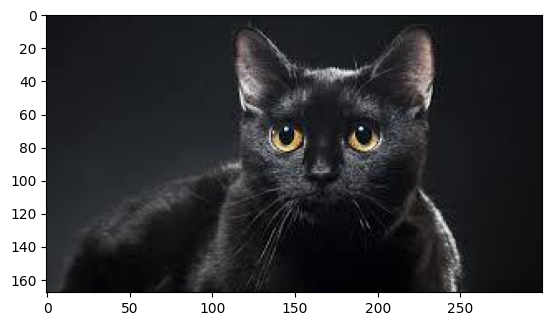

In [18]:
#plt.imshow(train_ds_cats_dogs[2][0]) #это кортеж, поэтому сначала выбираем номер кортежа, затем элемент в нём
plt.imshow(train_ds_cats_dogs[2]['img']) 

In [19]:
train_ds_cats_dogs[2]['img']

tensor([[[0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         ...,
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863]],

        [[0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         ...,
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863]],

        [[0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         [0.0706, 0.0745, 0.0941],
         ...,
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863],
         [0.0627, 0.0667, 0.0863]],

        ...,

        [[0.1765, 0.1961, 0.2118],
         [0.1804, 0.2000, 0.2157],
         [0.1843, 0.2000, 0.2118],
         ...,
         [0.0392, 0.0392, 0.0471],
         [0.0392, 0.0392, 0.0471],
         [0.0392, 0.0392, 0.0471]],

        [[0.1804, 0.2000, 0.2157],
         [0.1804, 0.2000, 0.2157],
         [0.